<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/06_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: x = 8.0, f(x) = 64.0
Epoch 10: x = 0.8589934592000003, f(x) = 0.7378697629483825
Epoch 20: x = 0.09223372036854777, f(x) = 0.008507059173023463
Epoch 30: x = 0.009903520314283045, f(x) = 9.807971461541694e-05
Epoch 40: x = 0.001063382396627933, f(x) = 1.1307821214581668e-06
Epoch 50: x = 0.00011417981541647683, f(x) = 1.3037030248540721e-08
Epoch 60: x = 1.2259964326927117e-05, f(x) = 1.5030672529752548e-10
Epoch 70: x = 1.3164036458569655e-06, f(x) = 1.7329185588255109e-12
Epoch 80: x = 1.4134776518227082e-07, f(x) = 1.9979190722022372e-14
Epoch 90: x = 1.5177100720513518e-08, f(x) = 2.3034438628061196e-16


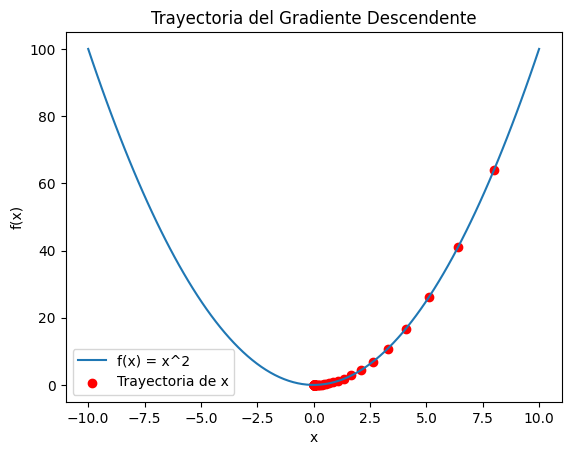

Valor óptimo de x: 2.0370359763344878e-09


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función objetivo (x^2)
def objective_function(x):
    return x ** 2

# Derivada de la función objetivo (gradiente)
def gradient(x):
    return 2 * x

# Función de gradiente descendente
def gradient_descent(starting_point, learning_rate, epochs):
    x = starting_point
    history = []  # Para almacenar la trayectoria de x

    for epoch in range(epochs):
        grad = gradient(x)  # Calcular el gradiente en el punto actual
        x = x - learning_rate * grad  # Actualizar el valor de x
        history.append(x)  # Guardar la trayectoria para visualizar

        # Imprimir cada 10 iteraciones
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: x = {x}, f(x) = {objective_function(x)}")

    return x, history

# Parámetros
starting_point = 10  # Empezamos en x = 10
learning_rate = 0.1  # Tasa de aprendizaje
epochs = 100  # Número de iteraciones

# Ejecutar el gradiente descendente
optimal_x, history = gradient_descent(starting_point, learning_rate, epochs)

# Visualizar la trayectoria de x
x_values = np.linspace(-10, 10, 100)
y_values = objective_function(x_values)

plt.plot(x_values, y_values, label="f(x) = x^2")
plt.scatter(history, objective_function(np.array(history)), color='red', label="Trayectoria de x")
plt.title("Trayectoria del Gradiente Descendente")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

print(f"Valor óptimo de x: {optimal_x}")

Epoch 0: Loss = 0.6931471805599453
Epoch 100: Loss = 0.07870893569770744
Epoch 200: Loss = 0.0448197013363609
Epoch 300: Loss = 0.03206164385414116
Epoch 400: Loss = 0.025268590170382875
Epoch 500: Loss = 0.02101063160696546
Epoch 600: Loss = 0.018072853896496623
Epoch 700: Loss = 0.01591344351642861
Epoch 800: Loss = 0.014253278909937168
Epoch 900: Loss = 0.012933479987125992


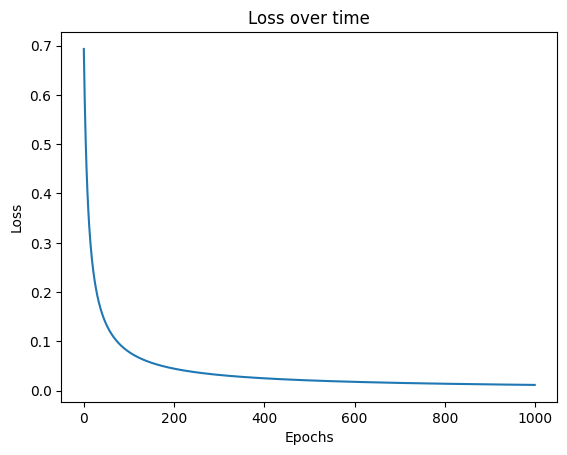

Precisión en el conjunto de prueba: 100.00%


In [2]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Función Sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida logarítmica
def loss_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Gradiente Descendente
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    for epoch in range(epochs):
        linear_model = np.dot(X, weights) + bias
        h = sigmoid(linear_model)

        # Calcular gradientes
        dw = np.dot(X.T, (h - y)) / m
        db = np.sum(h - y) / m

        # Actualizar los pesos
        weights -= lr * dw
        bias -= lr * db

        # Guardar la pérdida en cada iteración
        loss = loss_function(h, y)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss}")

    return weights, bias, losses

# Cargar el dataset Iris
iris_data = load_iris()
X = iris_data.data
y = (iris_data.target == 0).astype(int)  # Clasificación binaria (setosa vs no setosa)

# Escalar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
learning_rate = 0.1
epochs = 1000
weights, bias, losses = gradient_descent(X_train, y_train, lr=learning_rate, epochs=epochs)

# Visualizar la pérdida
plt.plot(losses)
plt.title("Loss over time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Predicción en el conjunto de prueba
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    probabilities = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in probabilities]

y_pred = predict(X_test, weights, bias)

# Calcular precisión
accuracy = np.mean(y_pred == y_test)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Cargar el dataset

data = pd.read_csv("/content/multiple_linear_regression_dataset.csv")

In [4]:
data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [5]:
# Definir las variables independientes y la dependiente
X = data[['age', 'experience']]
y = data['income']

In [6]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Configurar el modelo
hidden_layer_sizes = (10,)  # 5 neuronas en la capa oculta
epochs = 1000  # número de epochs

In [9]:
model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=epochs, random_state=42)


In [10]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Imprimir las predicciones
for i, pred in enumerate(y_pred):
    print(f'Predicción para {X_test.iloc[i].to_list()}: {pred:.2f}')

Mean Squared Error: 1163720821.32
Predicción para [25, 1]: 52.70
Predicción para [23, 1]: 55.15
Predicción para [41, 6]: 17.82
Predicción para [30, 3]: 39.83


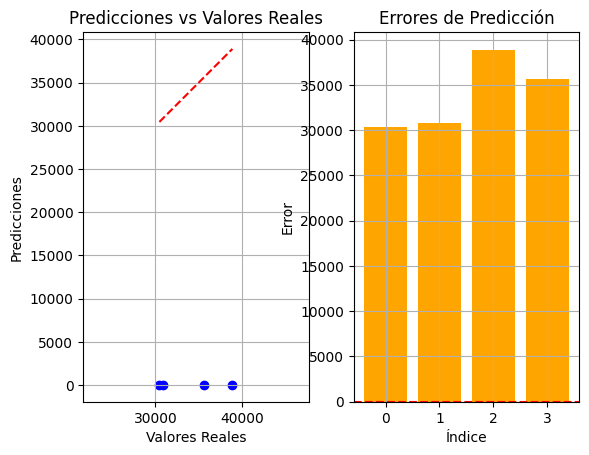

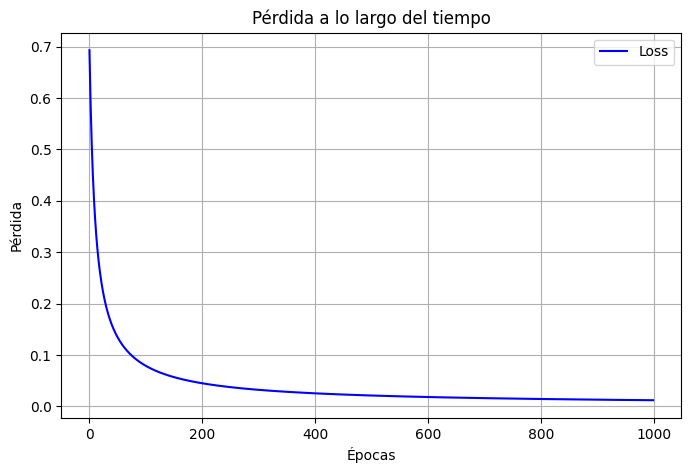

In [12]:


    # Gráfico de predicciones vs. valores reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de igualdad
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.axis('equal')
plt.grid()

# Gráfico de errores
plt.subplot(1, 2, 2)
errors = y_test - y_pred
plt.bar(range(len(errors)), errors, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Errores de Predicción')
plt.xlabel('Índice')
plt.ylabel('Error')
plt.grid()

# Visualizar la pérdida
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss', color='blue')
plt.title("Pérdida a lo largo del tiempo")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.grid()
plt.show()


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [14]:
# Cargar dataset desde un archivo CSV
data = pd.read_csv("/content/multiple_linear_regression_dataset.csv")

# Mostrar las primeras filas del dataset para verificar que se cargó correctamente
print(data.head())


   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830


In [15]:
# Supongamos que las columnas son 'age', 'experience' y 'income'
# Separar características (X) y target (y)
X = data[['age', 'experience']].values  # Variables independientes
y = data['income'].values  # Variable dependiente (lo que queremos predecir)


In [16]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (opcional pero recomendable para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construcción del modelo de Keras
model = Sequential()

In [17]:

# Añadir la primera capa oculta con 64 neuronas y la capa de entrada de 2 características
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Añadir más capas ocultas si es necesario
model.add(Dense(32, activation='relu'))

# Capa de salida (1 neurona para predicción de un valor continuo)
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluar el modelo
loss = model.evaluate(X_test_scaled, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Realizar predicciones
predicciones = model.predict(X_test_scaled)
print(predicciones)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1875099520.0000
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1854852864.0000 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1841762176.0000 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1852994688.0000 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1850748416.0000 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1915654272.0000 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1920965376.0000 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1937626368.0000 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1901033728.0000 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1855784704.0000 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1789260416.0000
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1902501632.0000 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1798404736.0000 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar dataset
data = pd.read_csv("/content/diabetes.csv")

# Mostrar las primeras filas del dataset para verificar
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
# Separar las características (X) de la variable objetivo (y)
X = data.drop('Outcome', axis=1).values  # Todas las columnas excepto 'Outcome'
y = data['Outcome'].values  # Solo la columna 'Outcome'


In [21]:
# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Estandarizar las características (escalar los datos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:

# Construcción del modelo de red neuronal
model = Sequential()

# Añadir la primera capa oculta con 64 neuronas (relu) y la capa de entrada (8 características)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Añadir otra capa oculta con 32 neuronas (relu)
model.add(Dense(32, activation='relu'))

# Añadir una capa de salida con 1 neurona (sigmoid) para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con optimizador Adam y función de pérdida binary_crossentropy para clasificación binaria
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5240 - loss: 0.6790
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7247 - loss: 0.5348
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7359 - loss: 0.4928
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7734 - loss: 0.4568
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8013 - loss: 0.4239
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7919 - loss: 0.4406
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.4123
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 0.4137
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7785 - loss: 0.4392
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - loss: 0.4256
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.3817
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4238


In [24]:
# Evaluar el modelo con el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7442 - loss: 0.6095  
Pérdida en el conjunto de prueba: 0.651879072189331
Precisión en el conjunto de prueba: 0.7337662577629089


In [25]:
# Realizar predicciones
predicciones = model.predict(X_test_scaled)
predicciones = (predicciones > 0.5).astype(int)  # Convertir probabilidades en etiquetas (0 o 1)
print(predicciones)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar dataset
data = pd.read_csv("/content/Fish.csv")

In [27]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# **características y etiquetas para regresión y clasificación**

In [28]:
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]  # Características para ambos modelos


In [29]:
# Para regresión (predicción del peso)
y_reg = data['Weight']

In [30]:
# Para clasificación (Clasificacion de la especie)
y_clf = data['Species']

In [31]:
# Convertir las etiquetas de clasificación a números (encoding)
encoder = LabelEncoder()
y_clf = encoder.fit_transform(y_clf)  # Convierte las especies a números

In [33]:
# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)
X_train_clf, X_test_clf, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.3, random_state=42)

In [34]:
# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)
X_train_clf, X_test_clf, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.3, random_state=42)

In [35]:
# Escalar las características (para ambos problemas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

**REGRESIÓN**

predecir el peso de un pez usando las caracteristicas fisicas length1, length2 length3, height, width

In [36]:
# Crear el modelo de regresión
model_reg = Sequential()

In [37]:
# Añadir la primera capa oculta con 64 neuronas (relu) y la capa de entrada (5 características)
model_reg.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Añadir otra capa oculta con 32 neuronas (relu)
model_reg.add(Dense(32, activation='relu'))

In [39]:
# Añadir una capa de salida con 1 neurona (sin activación) para regresión ya que es un valor continuo  no una cateoria ni clase
model_reg.add(Dense(1))

In [40]:
# Compilar el modelo con el optimizador Adam y la función de pérdida mse (mean squared error) para regresión
model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [41]:
# Entrenar el modelo
model_reg.fit(X_train_scaled, y_reg_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 363891.2500 - mae: 458.5394 - val_loss: 167025.5625 - val_mae: 308.8867
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 321576.6562 - mae: 423.9342 - val_loss: 166959.8594 - val_mae: 308.8058
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 287816.4688 - mae: 403.9424 - val_loss: 166891.7656 - val_mae: 308.7242
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 298348.7812 - mae: 417.7378 - val_loss: 166818.2812 - val_mae: 308.6395
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 334136.0312 - mae: 426.4479 - val_loss: 166737.1562 - val_mae: 308.5482
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 343113.7812 - mae: 439.1397 - val_loss: 166648.3594 - val_mae: 308.4494
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 380337.7500 - mae: 474.2986 - val_loss: 166552.8281 - val_mae: 308.3462
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 273359.0312 - mae: 389.5394 - v

In [42]:
# Evaluar el modelo en los datos de prueba
loss, mae = model_reg.evaluate(X_test_scaled, y_reg_test)
print(f'Error cuadrático medio en el conjunto de prueba: {loss:.4f}, MAE: {mae:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21124.5391 - mae: 128.0374
Error cuadrático medio en el conjunto de prueba: 19178.7773, MAE: 120.8758


**`CLASIFICACIÓN`**

clasificar  la especie del pez segun sus caracteristicas.

In [43]:
# Crear el modelo de clasificación
model_clf = Sequential()

In [44]:
# Añadir la primera capa oculta con 64 neuronas (relu) y la capa de entrada (5 características)
model_clf.add(Dense(64, input_dim=X_train_clf_scaled.shape[1], activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Añadir otra capa oculta con 32 neuronas (relu)
model_clf.add(Dense(32, activation='relu'))

In [46]:
# Añadir una capa de salida con tantas neuronas como clases de especies (función softmax para multi-clasificación)
num_classes = len(encoder.classes_)
model_clf.add(Dense(num_classes, activation='softmax'))

In [47]:
# Compilar el modelo con optimizador Adam y función de pérdida categorical_crossentropy para clasificación multiclase
model_clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Entrenar el modelo
model_clf.fit(X_train_clf_scaled, y_clf_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.3345 - loss: 1.8761 - val_accuracy: 0.4348 - val_loss: 1.7909
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4134 - loss: 1.8075 - val_accuracy: 0.5652 - val_loss: 1.7450
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4691 - loss: 1.7471 - val_accuracy: 0.6087 - val_loss: 1.6987
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5440 - loss: 1.7067 - val_accuracy: 0.6522 - val_loss: 1.6536
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5955 - loss: 1.6585 - val_accuracy: 0.6957 - val_loss: 1.6151
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6399 - loss: 1.6163 - val_accuracy: 0.6957 - val_loss: 1.5787
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6612 - loss: 1.5822 - val_accuracy: 0.6957 - val_loss: 1.5439
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6729 - loss: 1.5251 - val_accuracy: 0.6957 - val_loss

In [49]:
# Evaluar el modelo en los datos de prueba
loss_clf, accuracy_clf = model_clf.evaluate(X_test_clf_scaled, y_clf_test)
print(f'Pérdida en el conjunto de prueba: {loss_clf:.4f}, Precisión: {accuracy_clf:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8646 - loss: 0.4443 
Pérdida en el conjunto de prueba: 0.4257, Precisión: 0.8750
